## Observations and Insights 

* There is a strong positive correlation between mouse weight and final tumor volume (at least for mice in the Capomulin regimen).
* There was far less variation in the tumor volumes of mice treated in the Capomulin and Ramicane regimens than any of the other other regimens.
* The trials involed an almost equal distribution of male and female mice.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Find Mouse ID(s) that contain duplicate Timepoint values
duplicate_finder = study_results.groupby(["Mouse ID","Timepoint"]).count()
found_mouse = duplicate_finder.loc[duplicate_finder["Tumor Volume (mm3)"] >1]
mouse_to_delete = found_mouse.index[0][0]
print(f"Data for Mouse ID: {mouse_to_delete} is to be removed")

Data for Mouse ID: g989 is to be removed


In [2]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_results = study_results.set_index("Mouse ID")
cleaned_results = cleaned_results.drop("g989",axis=0)

merged_data = pd.merge(cleaned_results,mouse_metadata,on="Mouse ID",how="left")

In [3]:
# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary Statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

regimens = merged_data["Drug Regimen"].unique()
mean_list = []
med_list = []
var_list = []
std_list = []
sem_list = []

drug_index = merged_data.set_index("Drug Regimen")

for regimen in regimens:
    values = drug_index.loc[regimen,"Tumor Volume (mm3)"]
    mean_list.append(round(np.mean(values),2))
    med_list.append(round(np.median(values),2))
    var_list.append(round(np.var(values),2))
    std_list.append(round(np.std(values),2))
    sem_list.append(round(sem(values),2))

summarytable = pd.DataFrame({"Drug Regimen":regimens,
                        "Mean Tumor Volume (mm3)":mean_list,
                       "Median Tumor Volume (mm3)":med_list,
                       "Tumor Volume (mm3) Variance":var_list,
                       "Tumor Volume (mm3) St.Dev.":std_list,
                       "Tumor Volume (mm3) SEM":sem_list
                       })

summarytable.sort_values("Drug Regimen")

,Drug Regimen,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume (mm3) Variance,Tumor Volume (mm3) St.Dev.,Tumor Volume (mm3) SEM
0,Capomulin,40.68,41.56,24.84,4.98,0.33
9,Ceftamin,52.59,51.78,39.07,6.25,0.47
3,Infubinol,52.88,51.82,42.89,6.55,0.49
1,Ketapril,55.24,53.70,68.19,8.26,0.60
2,Naftisol,54.33,52.51,65.82,8.11,0.60
8,Placebo,54.03,52.29,60.83,7.80,0.58
7,Propriva,52.32,50.45,43.56,6.60,0.54
5,Ramicane,40.22,40.67,23.38,4.84,0.32
4,Stelasyn,54.23,52.43,59.12,7.69,0.57
6,Zoniferol,53.24,51.82,48.27,6.95,0.52


In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

data_grp = merged_data.groupby("Drug Regimen")
summary_stats =pd.DataFrame({"Mean Tumor Volume (mm3)":round(data_grp["Tumor Volume (mm3)"].mean(),2),
                            "Median Tumor Volume (mm3)":round(data_grp["Tumor Volume (mm3)"].median(),2),
                            "Tumor Volume Variance":round(data_grp["Tumor Volume (mm3)"].var(),2),
                            "Tumor Volume St Dev":round(data_grp["Tumor Volume (mm3)"].std(),2),
                            "Tumor Volume SEM":round(data_grp["Tumor Volume (mm3)"].sem(),2)
                            })

summary_stats.sort_values("Drug Regimen")

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume Variance,Tumor Volume St Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

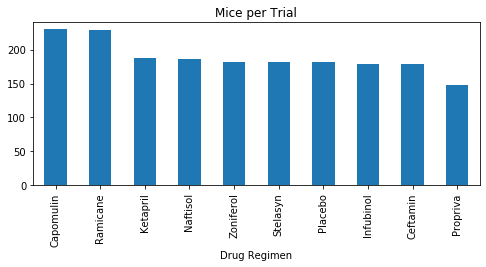

In [6]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
x_axis = regimens
mice = [len(drug_index.loc[drug]) for drug in regimens]

pie_frame = drug_index["Mouse ID"].groupby("Drug Regimen").count()
pie_frame.sort_values(ascending=False).plot(kind="bar",legend=False,figsize=(8,3),title="Mice per Trial",
                                                xlim=(-.5 ,len(x_axis)-0.5),ylim=(0,max(mice)+10),y="Mice in Trial")

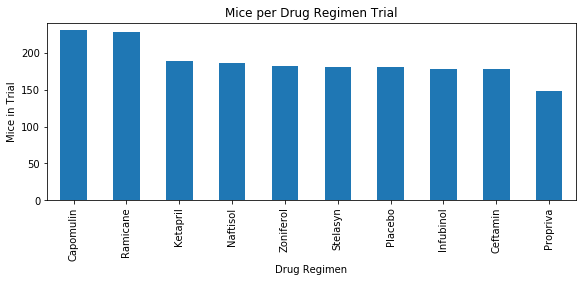

In [7]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

mice = [len(drug_index.loc[drug]) for drug in regimens]

Frame_to_pie = pd.DataFrame({"x_axis":x_axis,"mice":mice}).sort_values("mice",ascending=False)

plt.figure(figsize=[8,3])
plt.bar(Frame_to_pie["x_axis"],Frame_to_pie["mice"],width=.5,align="center")
plt.tight_layout()
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice in Trial")
plt.xlim(-.5 , len(x_axis)-0.5)
plt.ylim(0,max(mice)+10)
plt.title("Mice per Drug Regimen Trial")
plt.show()

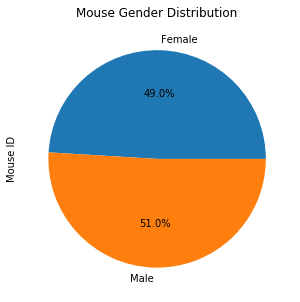

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_data = merged_data.groupby("Sex").count()

pie_data.plot(y="Mouse ID",kind="pie",title="Mouse Gender Distribution",legend=False,figsize=(5,5),autopct="%1.1f%%")


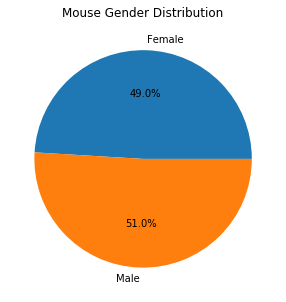

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = merged_data.groupby("Sex")
counts = gender["Mouse ID"].count()

plt.figure(figsize=[5,5])
plt.pie(counts,labels=["Female","Male"],autopct="%1.1f%%")
plt.title("Mouse Gender Distribution")
plt.show()


## Quartiles, Outliers and Boxplots

In [10]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

final_vol = merged_data.loc[(merged_data["Drug Regimen"] == "Capomulin") |
                           (merged_data["Drug Regimen"] == "Ramicane") |
                           (merged_data["Drug Regimen"] == "Infubinol") |
                           (merged_data["Drug Regimen"] == "Ceftamin"),:]

mouse_list=final_vol["Mouse ID"].unique()
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_volumes = []
treatments = []

for M in mouse_list:
    mouse_df = final_vol.loc[final_vol["Mouse ID"] == M, :]
    final_TP = max(mouse_df["Timepoint"])
    final_vol_df = mouse_df["Tumor Volume (mm3)"].loc[mouse_df["Timepoint"] == final_TP]
    final_vol_value = final_vol_df.iloc[0]
    final_volumes.append(final_vol_value)
    treatments.append(mouse_df.iloc[0,4])
    
volume_data = pd.DataFrame({"Mouse ID":mouse_list,
                           "Final Volume":final_volumes,
                           "Drug":treatments})

volume_data

,Mouse ID,Final Volume,Drug
0,b128,38.982878,Capomulin
1,c326,36.321346,Infubinol
2,c139,72.226731,Infubinol
3,v339,46.250112,Infubinol
4,a577,57.031862,Infubinol
...,...,...,...
95,t565,34.455298,Capomulin
96,i557,47.685963,Capomulin
97,m957,33.329098,Capomulin
98,f966,30.485985,Capomulin


In [11]:
# Create empty list to fill with tumor vol data (for plotting)

IQRs = []
LBounds = []
UBounds = []
all_outliers = []

for x in range(len(drug_list)):
    loop_data = volume_data.loc[volume_data["Drug"] == drug_list[x]]
    quartiles = loop_data["Final Volume"].quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    IQR = round(upperq - lowerq,2)
    lower_bound = round(lowerq - (1.5*IQR),2)
    upper_bound = round(upperq + (1.5*IQR),2)
    
    IQRs.append(IQR)
    LBounds.append(lower_bound)
    UBounds.append(upper_bound)
    
    drug_outliers = []
    for value in loop_data["Final Volume"]:
        if (value < lower_bound) | (value > upper_bound):
            drug_outliers.append(round(value,2))
        
    if len(drug_outliers) < 1:
        drug_outliers.append("NONE")
    
    all_outliers.append(drug_outliers[0])
        
OutlierAnalysis = pd.DataFrame({"Drug Regimen":drug_list,
                                "IQR":IQRs,
                                "Lower Bound":LBounds,
                                "Upper Bound":UBounds,
                                "Outliers":all_outliers})   

print(f"Final Tumor Volume (mm3) Outlier Analysis:")
OutlierAnalysis    

Final Tumor Volume (mm3) Outlier Analysis:


,Drug Regimen,IQR,Lower Bound,Upper Bound,Outliers
0,Capomulin,7.78,20.71,51.83,NONE
1,Ramicane,9.10,17.91,54.31,NONE
2,Infubinol,11.48,36.83,82.75,36.32
3,Ceftamin,15.58,25.35,87.67,NONE


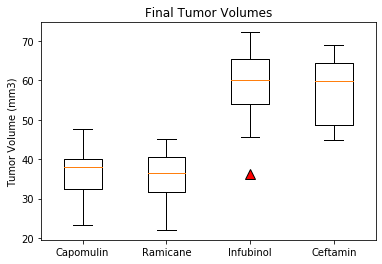

In [12]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

CAP_volumes = volume_data.loc[volume_data["Drug"]=="Capomulin"]
RAM_volumes = volume_data.loc[volume_data["Drug"]=="Ramicane"]
INF_volumes = volume_data.loc[volume_data["Drug"]=="Infubinol"]
CEF_volumes = volume_data.loc[volume_data["Drug"]=="Ceftamin"]

data_list = [CAP_volumes["Final Volume"], RAM_volumes["Final Volume"],
             INF_volumes["Final Volume"],CEF_volumes["Final Volume"]]

plt.boxplot(data_list,labels=drug_list,flierprops=dict(markerfacecolor="RED",marker="^",markersize=10))
plt.title("Final Tumor Volumes")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

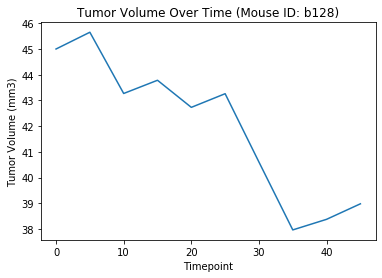

In [13]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
selected_data = merged_data.loc[(merged_data["Mouse ID"] == "b128")]
x_axis = selected_data["Timepoint"]

plt.plot(x_axis,selected_data["Tumor Volume (mm3)"])
plt.title("Tumor Volume Over Time (Mouse ID: b128)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.show()

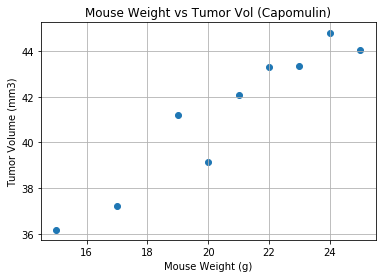

In [14]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
CAP_data = merged_data.loc[(merged_data["Drug Regimen"] == "Capomulin")]
CAP_grp = CAP_data.groupby("Weight (g)")
TvsW_df = pd.DataFrame(CAP_grp.mean())

plt.scatter(TvsW_df.index,TvsW_df["Tumor Volume (mm3)"])
plt.title("Mouse Weight vs Tumor Vol (Capomulin)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")
plt.grid(True)
plt.show()

## Correlation and Regression

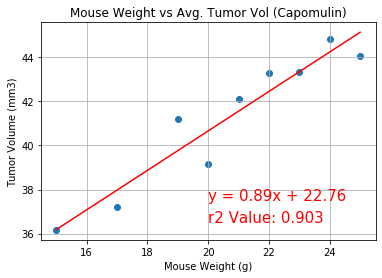

In [15]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
plt.scatter(TvsW_df.index,TvsW_df["Tumor Volume (mm3)"])

(slope,intercept,rvalue,p_value,stderr) = st.linregress(TvsW_df.index,TvsW_df["Tumor Volume (mm3)"])
regress_values = (TvsW_df.index)*slope + intercept
Reg_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
r_sq = f"r2 Value: {round(rvalue**2,3)}" 

plt.plot(TvsW_df.index,regress_values,color="r")
plt.title("Mouse Weight vs Avg. Tumor Vol (Capomulin)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")
plt.annotate(Reg_eq,(20,37.5),fontsize=15,color="red")
plt.annotate(r_sq,(20,36.5),fontsize=15,color="red")
plt.grid(True)
plt.show()